In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectFromModel

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression ,Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score , accuracy_score ,precision_score,f1_score,roc_auc_score


In [4]:
data=pd.read_csv('cleaned_loanData.csv',parse_dates=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d','next_pymnt_d'])

In [5]:
dataloan=data.copy()

In [6]:
data.columns

Index(['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'issue_month', 'issue_year'],
      dtype='object')

In [7]:
data.drop(['next_pymnt_d','last_pymnt_d','mths_since_last_delinq','last_credit_pull_d','Unnamed: 0',
           'earliest_cr_line','issue_d','addr_state','issue_month','issue_year'],axis=1,inplace=True)

In [8]:
data['revol_util'].fillna(data.revol_util.median(),inplace=True)

In [9]:
data['delinq_2yrs']=np.where(data['delinq_2yrs']>0,'Y','N')

In [10]:
data['inq_last_6mths']=np.where(data['inq_last_6mths']>0,'Y','N')

## Checking cooraleation and removing the columns which are high correlated 

In [ ]:
## Removed the correlated feature as done in previous notebook 

In [11]:
data.drop(['funded_amnt','funded_amnt_inv'],axis=1, inplace=True)

In [16]:
data.drop(['total_pymnt'],axis=1,inplace=True)

In [17]:
data.drop(['total_pymnt_inv'],axis=1,inplace=True)

In [18]:
data.drop(['total_rec_prncp'],axis=1,inplace=True)

In [19]:
data.drop(['installment'],axis=1,inplace=True)

In [25]:
data.drop('total_acc',axis=1,inplace=True)

In [20]:
data.corr()

,loan_amnt,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med
loan_amnt,1.000000,0.210969,0.114397,0.334379,0.052366,0.202179,-0.075560,0.333837,0.101161,0.232416,0.637916,0.047983,0.177240,0.127346,0.581438,-0.002357
int_rate,0.210969,1.000000,0.030092,-0.025994,0.172110,0.039259,0.082972,0.021488,0.342687,-0.010934,0.402950,0.055859,0.177920,0.117752,0.122859,0.028126
emp_length,0.114397,0.030092,1.000000,0.073045,0.050249,0.051278,0.047003,0.096758,0.043961,0.135960,0.069893,-0.009207,0.019099,0.013853,0.099449,0.003768
annual_inc,0.334379,-0.025994,0.073045,1.000000,-0.171535,0.140010,-0.018656,0.303778,0.024016,0.205707,0.175753,0.010704,0.024730,0.020136,0.231306,0.004007
dti,0.052366,0.172110,0.050249,-0.171535,1.000000,0.309338,-0.033777,0.153216,0.219597,0.232842,0.057255,-0.002302,0.050283,0.041810,0.022513,0.004858
open_acc,0.202179,0.039259,0.051278,0.140010,0.309338,1.000000,-0.012376,0.229805,-0.111622,0.672030,0.093728,-0.008809,0.030227,0.026170,0.155813,0.019672
pub_rec,-0.075560,0.082972,0.047003,-0.018656,-0.033777,-0.012376,1.000000,-0.104959,-0.064908,0.030584,-0.065916,-0.013989,-0.011414,-0.004927,0.003080,0.025027
revol_bal,0.333837,0.021488,0.096758,0.303778,0.153216,0.229805,-0.104959,1.000000,0.231797,0.206759,0.198301,0.005738,0.043862,0.032546,0.203661,-0.010911
revol_util,0.101161,0.342687,0.043961,0.024016,0.219597,-0.111622,-0.064908,0.231797,1.000000,-0.090695,0.205794,0.027935,0.059201,0.039535,0.011988,-0.024743
total_acc,0.232416,-0.010934,0.135960,0.205707,0.232842,0.672030,0.030584,0.206759,-0.090695,1.000000,0.099526,-0.012024,0.022407,0.023522,0.197684,0.018581


In [26]:
df=data._get_numeric_data()

In [27]:
vif = pd.DataFrame()

vif["VIF Factor"] = [round(variance_inflation_factor(df.values, i),3) for i in range(df.shape[1])]



In [28]:
vif["features"] = df.columns

In [29]:
vif[vif["VIF Factor"]>10]

,VIF Factor,features
0,11.733,loan_amnt
1,11.631,int_rate


In [30]:
y=data['loan_status']

In [31]:
numerical_vars = list(data.select_dtypes(exclude='object').columns)

In [32]:
data['loan_status']=np.where(data['loan_status']=='Charged Off',1,0)

In [33]:
lab= LabelEncoder()
col_count=0
for i in data:
    if data[i].dtype=='O' and data[i].nunique()<=2:
        if data[i].isnull().any()==False:
            lab.fit(data[i])
            data[i]=lab.transform(data[i])
            print(i)
            col_count+=1
            
print("total_columns updated",col_count)

term
delinq_2yrs
inq_last_6mths
initial_list_status
total_columns updated 4


In [34]:
data=pd.get_dummies(data)

In [35]:
y=data['loan_status']
X=data.drop('loan_status',axis=1)

In [36]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'grade_A', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'sub_grade_A1',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade

In [37]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.25 , random_state=50)

In [38]:
for i in numerical_vars:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train[[i]])
    
    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])
    
    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

D:\Installation\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Installation\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Installation\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [40]:
X_train.shape

(189589, 81)

In [41]:
X_test.shape

(63197, 81)

In [42]:
y_train.shape

(189589,)

In [43]:
sm = SMOTE(random_state=12)

In [44]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [49]:
lasso = Lasso()
alphas = [0.1,0.01,0.001,0.002]
scores = []
for n in alphas:
    lasso.set_params(alpha=n)
    lasso.fit(X_train_res, y_train_res)
    print('Validation Results : ',n)
    print(lasso.score(X_test, y_test))
    


Validation Results :  0.1
0.008349602612617857
Validation Results :  0.01
0.45131249140505797


D:\Installation\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.524173393030651, tolerance: 7.78145
  positive)


Validation Results :  0.001
0.49981424928639884
Validation Results :  0.002
0.48642386621312245


## Let us apply Lasso using Logistic regression with the best alpha velue fecthed from above and fetch the variables it used

### Applied to imbalanced data

In [45]:
LR_l1 = LogisticRegression(C = 0.002, penalty='l1',solver='liblinear')
LR_l1.fit(X_train, y_train)

interceptDF = pd.DataFrame(LR_l1.intercept_, index = ['Intercept'], columns = ['Value'])
coefDF = pd.DataFrame(LR_l1.coef_[0][np.where(LR_l1.coef_[0] != 0)], 
                      index = X_train_res.columns[np.where(LR_l1.coef_[0] != 0)], 
                      columns = ['Value'])

finalDF = pd.concat([interceptDF, coefDF])

In [46]:
finalDF

,Value
Intercept,-3.514218
loan_amnt,0.822967
term,0.777832
int_rate,0.667961
emp_length,0.005356
annual_inc,-0.100119
dti,0.228713
pub_rec,0.058985
initial_list_status,0.349134
total_rec_int,-0.678379


In [47]:
print('Validation Results')
print(LR_l1.score(X_test, y_test))
print(recall_score(y_test, LR_l1.predict(X_test)))
print(f1_score(y_test, LR_l1.predict(X_test)))
print(roc_auc_score(y_test, LR_l1.predict(X_test)))
print(precision_score(y_test, LR_l1.predict(X_test)))

Validation Results
0.9313258540753517
0.6800248800426515
0.779089891071974
0.8328988732269551
0.9119399428026692


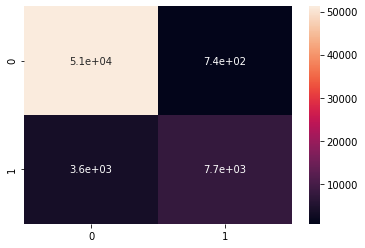

In [48]:
y_predict=LR_l1.predict(X_test)
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm , annot=True)

### Applying the same process to Balanced Data

In [49]:
LR_l1 = LogisticRegression(C = 0.002, penalty='l1',solver='liblinear')
LR_l1.fit(X_train_res, y_train_res)

LogisticRegression(C=0.002, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
interceptDF = pd.DataFrame(LR_l1.intercept_, index = ['Intercept'], columns = ['Value'])
coefDF = pd.DataFrame(LR_l1.coef_[0][np.where(LR_l1.coef_[0] != 0)], 
                      index = X_train_res.columns[np.where(LR_l1.coef_[0] != 0)], 
                      columns = ['Value'])

finalDF = pd.concat([interceptDF, coefDF])

In [51]:
finalDF['absval'] = abs(finalDF['Value'])
finalDF.sort_values(by='absval',ascending=False)

,Value,absval
recoveries,9.202751,9.202751
last_pymnt_amnt,-6.601049,6.601049
home_ownership_OWN,-1.276333,1.276333
loan_amnt,1.253511,1.253511
verification_status_Not Verified,-1.210749,1.210749
verification_status_Verified,-1.151577,1.151577
home_ownership_RENT,-1.096121,1.096121
home_ownership_MORTGAGE,-1.069697,1.069697
verification_status_Source Verified,-1.068654,1.068654
total_rec_int,-1.030198,1.030198


In [52]:
print('Validation Results')
print(LR_l1.score(X_test, y_test))
print(recall_score(y_test, LR_l1.predict(X_test)))
print(f1_score(y_test, LR_l1.predict(X_test)))
print(roc_auc_score(y_test, LR_l1.predict(X_test)))
print(precision_score(y_test, LR_l1.predict(X_test)))

Validation Results
0.9236514391505926
0.9198507197440909
0.8109992557483644
0.9221628124643101
0.7251838879159369


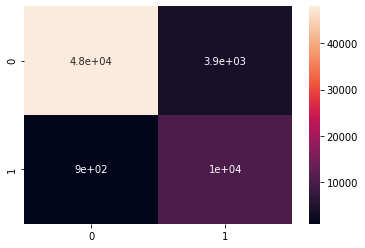

In [53]:
y_predict=LR_l1.predict(X_test)
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm , annot=True)

## Selecting important features by Applyting the same process using SelectFromModel

In [54]:
sel_ = SelectFromModel(LogisticRegression(C=0.002, penalty='l1',solver='liblinear'))
sel_.fit(X_train_res, y_train_res)

SelectFromModel(estimator=LogisticRegression(C=0.002, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

### Visualising features that were kept by the lasso regularisation

##### True is for the features that lasso thought is important (non-zero features) while False is for the features whose weights were shrinked to zero and are not important according to Lasso.

In [55]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False])

In [56]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 81
selected features: 30
features with coefficients shrank to zero: 51


In [57]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['revol_util', 'collection_recovery_fee', 'grade_B', 'grade_E',
       'grade_F', 'grade_G', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'purpose_car',
       'purpose_debt_consolidation', 'purpose_educational', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [58]:
selected_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
selected_feats

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'grade_A', 'grade_C', 'grade_D', 'sub_grade_B3',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_home_improvement', 'purpose_other'],
      dtype='object')

### Deleting the unused columns and taking only the columns selected by Lasso

In [59]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
X_train_selected.shape, X_test_selected.shape

((189589, 30), (63197, 30))

### As the sample was imbalanced doing smote transformation to balanced the data

In [60]:
X_train_sel_res, y_train_sel_res = sm.fit_sample(X_train_selected, y_train)

### Applying the selected feature test to Random Forest 

In [61]:
rf = RandomForestClassifier()
rf.fit(X_train_sel_res, y_train_sel_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
print('Validation Results')
print(rf.score(X_test_selected, y_test))
print(recall_score(y_test, rf.predict(X_test_selected)))
print(f1_score(y_test, rf.predict(X_test_selected)))
print(roc_auc_score(y_test, rf.predict(X_test_selected)))
print(precision_score(y_test, rf.predict(X_test_selected)))

Validation Results
0.9689225754387075
0.9082992713701795
0.9123527311674401
0.9451782632191176
0.9164425318271472


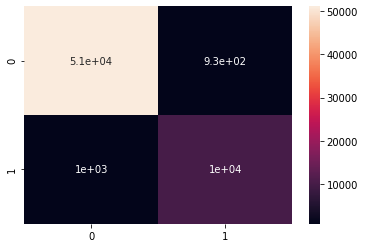

In [63]:
y_predict=rf.predict(X_test_selected)
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm , annot=True)

## Checking Feature importance according to Random Forest

In [64]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_res, y_train_res)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
print('Validation Results')
print(rf1.score(X_test, y_test))
print(recall_score(y_test, rf1.predict(X_test)))
print(f1_score(y_test, rf1.predict(X_test)))
print(roc_auc_score(y_test, rf1.predict(X_test)))
print(precision_score(y_test, rf1.predict(X_test)))

Validation Results
0.966090162507714
0.8990581126710503
0.9042405826891281
0.9398357386603813
0.9094831460674158


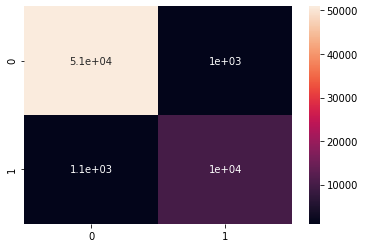

In [66]:
y_predict=rf1.predict(X_test)
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm , annot=True)

### Features DataFrame

In [67]:
features=pd.DataFrame({'Importance':rf1.feature_importances_},index=X_test.columns)
features=features.sort_values(by=['Importance'],ascending=False)

In [68]:
features[:15]

,Importance
last_pymnt_amnt,0.395506
recoveries,0.160736
collection_recovery_fee,0.122144
int_rate,0.044527
total_rec_int,0.034122
loan_amnt,0.030283
dti,0.020348
annual_inc,0.020263
revol_util,0.016767
open_acc,0.016654


[]

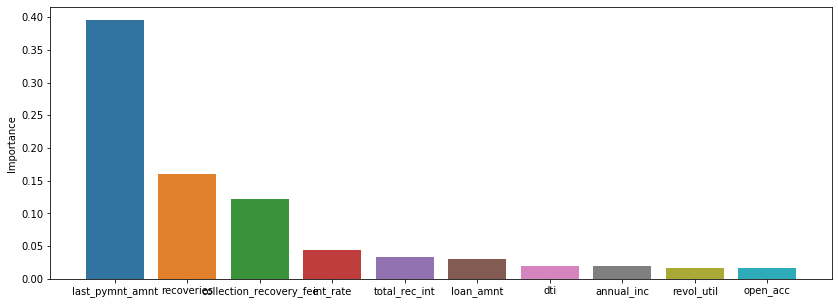

In [69]:
plt.figure(figsize=[14,5])
sns.barplot(x=features.index[:10],y=features.Importance[:10])
plt.plot()

### K-fold Cross Validation

In [70]:
lasso_log = cross_val_score(LogisticRegression(max_iter=2000), X_train_sel_res, y_train_sel_res, scoring = 'accuracy',
                            cv = KFold(5, shuffle = True))

print("Accuracy of Logistic Regression: %.2f"%(np.mean(lasso_log)*100), "%")

Accuracy of Logistic Regression: 94.24 %


In [71]:
lasso_tree = cross_val_score(DecisionTreeClassifier(), X_train_sel_res, y_train_sel_res, 
                                   scoring = 'accuracy', cv = KFold(10, 
                                   shuffle = True))
lasso_forest = cross_val_score(RandomForestClassifier(),  X_train_sel_res, y_train_sel_res, scoring = 'accuracy', 
                                  cv = KFold(10, shuffle = True))
print("Accuracy of Decision Tree : %.2f"%(np.mean(lasso_tree)*100), "%")
print("Accuracy of Random Forest: %.2f"%(np.mean(lasso_forest)*100), "%")

Accuracy of Decision Tree : 97.32 %
Accuracy of Random Forest: 98.35 %
